part a
question 1
confusion matrix for q value 2 is equal to
[[106  12]
 [  4 215]]
classification accuracy in decimal for q value 2 is equal to 0.9525222551928784

confusion matrix for q value 4 is equal to
[[111   7]
 [  5 214]]
classification accuracy in decimal for q value 4 is equal to 0.9643916913946587

confusion matrix for q value 8 is equal to
[[105  13]
 [  6 213]]
classification accuracy in decimal for q value 8 is equal to 0.9436201780415431

confusion matrix for q value 16 is equal to
[[ 85  33]
 [  1 218]]
classification accuracy in decimal for q value 16 is equal to 0.8991097922848664

part b
question 1
                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000    

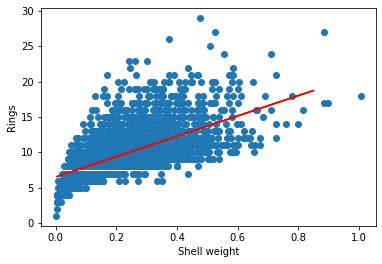

prediction accuracy on the training data using root mean squared error 2.527
prediction accuracy on the test data using root mean squared error 2.474


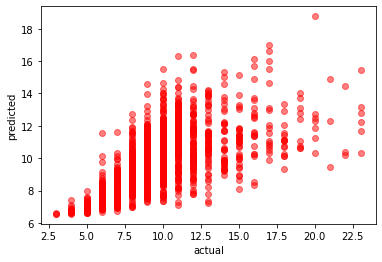

question 2
prediction accuracy on the training data using root mean squared error 2.213
prediction accuracy on the test data using root mean squared error 2.225


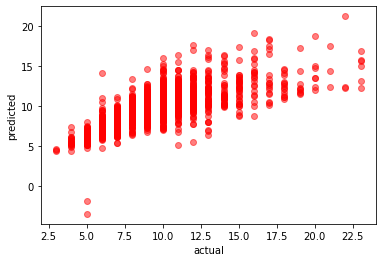

question 3
                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
S

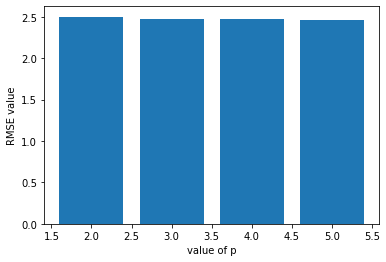

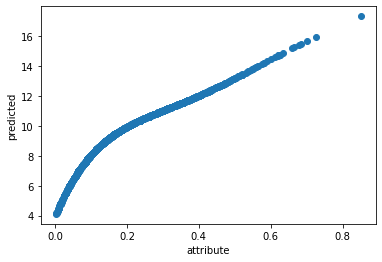

the prediction accuracy on the test data for the different values of degree ofthe polynomial p = 2  using root mean squared error (RMSE) is  2.4399355695693083
the prediction accuracy on the test data for the different values of degree ofthe polynomial p = 3  using root mean squared error (RMSE) is  2.4163398930158513
the prediction accuracy on the test data for the different values of degree ofthe polynomial p = 4  using root mean squared error (RMSE) is  2.415428965640593
the prediction accuracy on the test data for the different values of degree ofthe polynomial p = 5  using root mean squared error (RMSE) is  2.417683126590104


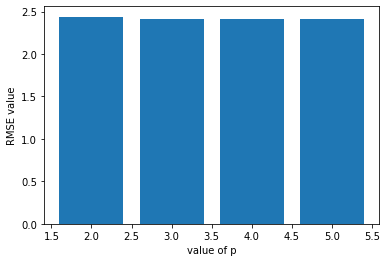

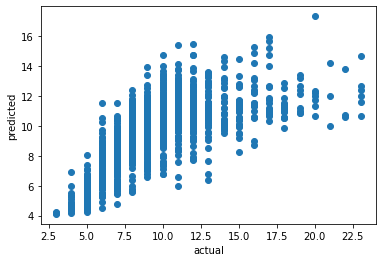

question 4
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 2  using root mean squared error (RMSE) is  2.0757749912017016
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 3  using root mean squared error (RMSE) is  1.9841829977155807
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 4  using root mean squared error (RMSE) is  1.8306481019517309
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 5  using root mean squared error (RMSE) is  1.5601140972638559


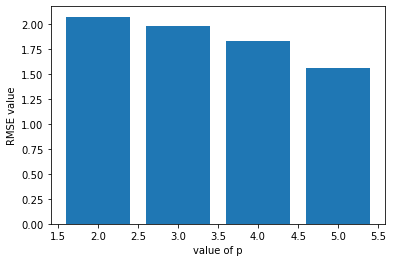

the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 2  using root mean squared error (RMSE) is  2.1901958457970085
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 3  using root mean squared error (RMSE) is  2.6796952158838274
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 4  using root mean squared error (RMSE) is  20.839882804908488
the prediction accuracy on the training data for the different values of degree ofthe polynomial p = 5  using root mean squared error (RMSE) is  99.00565797018405


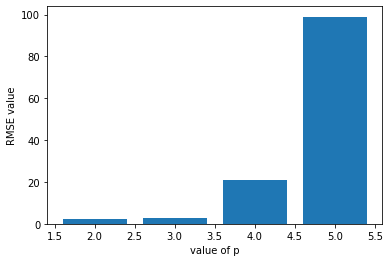

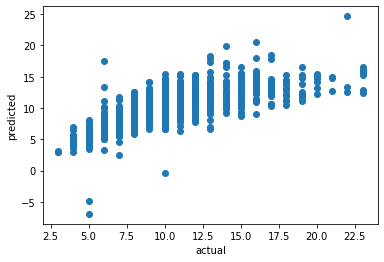

In [25]:
#Lab 5
#B20172, Vivek jaiswal
print("part a")
#part a
#question 1
print("question 1")
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# reading the csv files of training and testing dataset
train = pd.read_csv("SteelPlateFaults-train.csv")
test = pd.read_csv("SteelPlateFaults-test.csv")
y= test['Class'].values
# dropping the attributes with correaltion value 1
train = train.drop(['Y_Minimum', 'X_Minimum','TypeOfSteel_A300', 'TypeOfSteel_A400'], axis=1)
test = test.drop(['Y_Minimum', 'X_Minimum','TypeOfSteel_A300', 'TypeOfSteel_A400'], axis=1)
# separating data of training based on class
train0 = train.groupby('Class').get_group(0).to_numpy()
train0 = np.delete(train0, 23, axis=1)
train1 = train.groupby('Class').get_group(1).to_numpy()
train1 = np.delete(train1, 23, axis=1)
# dropping the class attribute
train = train.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)
# number of n_components
q = [2, 4, 8, 16]
for k in q:
    ypred = []
    # building gmm of each class
    gmm0 = GaussianMixture(n_components=k, covariance_type='full', reg_covar=1e-5).fit(train0)
    gmm1 = GaussianMixture(n_components=k, covariance_type='full', reg_covar=1e-5).fit(train1)
    # computing the weighted log probabilities
    log0 = gmm0.score_samples(test) + np.log(len(train0) / len(train))
    log1 = gmm1.score_samples(test) + np.log(len(train1) / len(train))
    for i in range(len(log0)):
        if log0[i] > log1[i]:
            ypred.append(0)

        else:
            ypred.append(1)
    print("confusion matrix for q value", k,"is equal to")
    print(confusion_matrix(y, ypred))
    print("classification accuracy in decimal for q value", k, "is equal to", accuracy_score(y, ypred))
    print()
# part a 
#question 2 table has been made on report 
#part b
print("part b")
#question 1
print("question 1")

data = pd.read_csv("abalone.csv")
# creating traing and testing data
y = data["Rings"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

train = pd.concat([X_train, y_train], axis=1, join='inner')
test = pd.concat([X_test, y_test], axis=1, join='inner')

# saving the training and testing datasets as csv files
train.to_csv('abalone-train.csv', index=False)
test.to_csv('abalone-test.csv', index=False)

# finding correlation
print(data.corr())

# since shell weight ihas maximum correlation
x_train = X_train["Shell weight"]
x_test = X_test["Shell weight"]

# model building
reg = LinearRegression()
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
reg.fit(x_train, y_train)

# predicting x_test and using it plot line
y = reg.predict(x_test)
# scattter plot b/w selected attribute and target attribute
plt.scatter(x_train, y_train)
plt.plot(x_test, y, color="r")
plt.xlabel("Shell weight")
plt.ylabel("Rings")
plt.show()

# predicting using obtained model
pred_1 = reg.predict(x_train)
pred_2 = reg.predict(x_test)

# calculating rmse value

def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


print("prediction accuracy on the training data using root mean squared error",
      round(rmse(pred_1, y_train), 3))
print("prediction accuracy on the test data using root mean squared error",
      round(rmse(pred_2, y_test), 3))

# scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data.
plt.scatter(y_test, pred_2, color="red", alpha=0.5)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

#question 2
print("question 2")
data = pd.read_csv("abalone.csv")
y = data["Rings"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# building model and fitting data
reg = LinearRegression()
reg.fit(X_train, y_train)


# predicting through built model
pred_1 = reg.predict(X_train)
pred_2 = reg.predict(X_test)

# function for calculating rmse


def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


# printing both of them
print("prediction accuracy on the training data using root mean squared error",
      round(rmse(pred_1, y_train), 3))
print("prediction accuracy on the test data using root mean squared error",
      round(rmse(pred_2, y_test), 3))

# scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data.
plt.scatter(y_test, pred_2, color="red", alpha=0.5)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()
#question 3
print("question 3")
data = pd.read_csv("abalone.csv")
# creating traing and testing data
y = data["Rings"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# finding correlation
print(data.corr())


# since shell weight has maximum correlation
x_train = X_train["Shell weight"]
x_test = X_test["Shell weight"]

# reshaing for modelling data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

# function for findign rmse


def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


# for every p in (2,3,4,5) making polyreg model and predicting training data
P = [2, 3, 4, 5]
RMSE1 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(x_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(x_train))
    print("the prediction accuracy on the training data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_train))
    RMSE1.append(rmse(predict1, y_train))
plt.bar(P, RMSE1)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()

# since best prediction is at p=5
p = 5
poly_features = PolynomialFeatures(p)
x_poly = poly_features.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
predict1 = regressor.predict(poly_features.fit_transform(x_test))
plt.scatter(x_test, predict1)
plt.xlabel("attribute")
plt.ylabel("predicted")
plt.show()

# for every p in (2,3,4,5) making polyreg model and predicting test data
P = [2, 3, 4, 5]
RMSE2 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(x_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(x_test))
    print("the prediction accuracy on the test data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_test))
    RMSE2.append(rmse(predict1, y_test))
plt.bar(P, RMSE2)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()

# since best prediction is at p=5
p = 5
poly_features = PolynomialFeatures(p)
x_poly = poly_features.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
predict1 = regressor.predict(poly_features.fit_transform(x_test))
plt.scatter(y_test, predict1)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()
#question 4
print("question 4")
data = pd.read_csv("abalone.csv")
# creating traing and testing data
y = data["Rings"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# function to calculate rmse


def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


# for every p in (2,3,4,5) making polyreg model and predicting training data
P = [2, 3, 4, 5]
RMSE1 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(X_train))
    print("the prediction accuracy on the training data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_train))
    RMSE1.append(rmse(predict1, y_train))
plt.bar(P, RMSE1)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()


# for every p in (2,3,4,5) making polyreg model and predicting test data
P = [2, 3, 4, 5]
RMSE1 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(X_test))
    print("the prediction accuracy on the training data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_test))
    RMSE1.append(rmse(predict1, y_test))
plt.bar(P, RMSE1)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()


# since p=2 has lowest rsme
p = 2
poly_features = PolynomialFeatures(p)
x_poly = poly_features.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
predict1 = regressor.predict(poly_features.fit_transform(X_test))
plt.scatter(y_test, predict1)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()
